In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
sns.set()

In [2]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
# Load datasets
gun_laws = pd.read_csv('../databases/gun_laws.zip', compression='zip')
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip', converters={'year': lambda x: str(x), 'month': lambda x: str(x)})
participants = pd.read_csv('../databases/participants.zip', compression='zip')
states = pd.read_csv('../databases/states.zip', compression='zip')

## Número de Incidentes por Estado

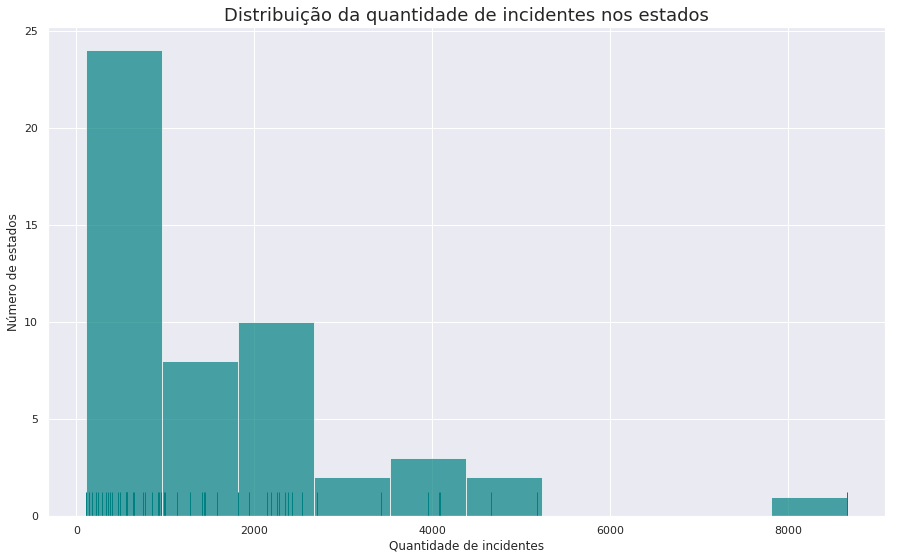

In [4]:
sns.distplot(
    states['n_incidents'],
    kde=False,
    rug=True,
    color='teal',
    hist_kws=dict(alpha=0.7)
)

# Título do plot
plt.title("Distribuição da quantidade de incidentes nos estados", fontsize=18)
# Nome do eixo x
plt.xlabel('Quantidade de incidentes')
# Nome do eixo y
plt.ylabel('Número de estados')
plt.show()

#### Por estado dos EUA

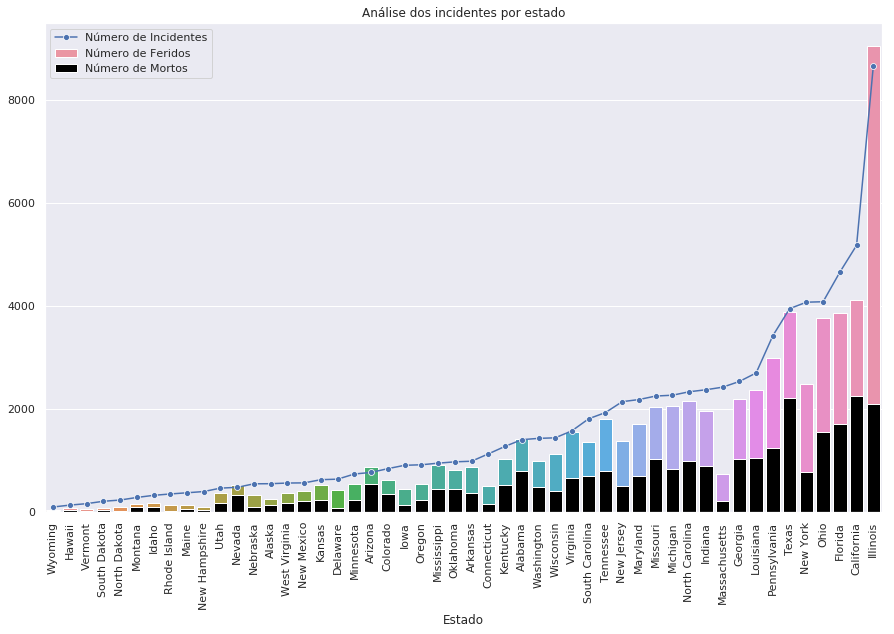

In [5]:
# Needs improvement - conferir se num de acidentes faz sentido com num de feridos

# Tirar o comentário abaixo para ajustar o tamanho da figura com essa linha caso desejado:
#matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

states['total_killed_injured'] = (states['n_injured'] + states['n_killed'])
sorted_states = states.sort_values('n_incidents')

# Define o plot
sns.lineplot(x='state', y='n_incidents', marker='o',
                     data=sorted_states, label='Número de Incidentes', sort=False)
sns.barplot(x='state', y='total_killed_injured',
                     data=sorted_states, label='Número de Feridos')
sns.barplot(x='state', y='n_killed', color="black",
                     data=sorted_states,label='Número de Mortos')
# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

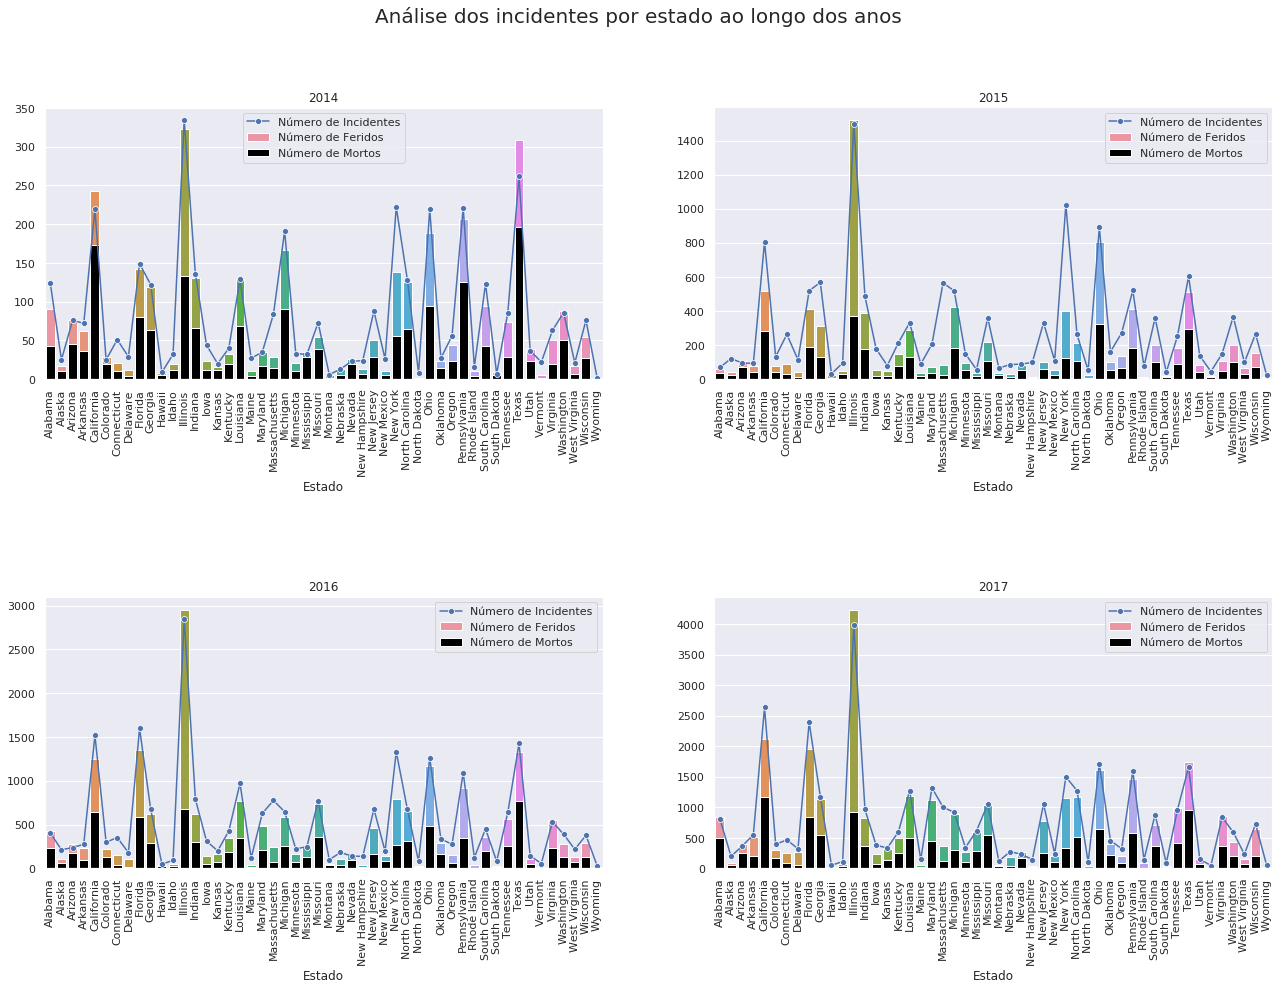

In [6]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Análise dos incidentes por estado ao longo dos anos', fontsize=20)

for index, year in enumerate(range(2014, 2018)):
    ax = fig.add_subplot(2,2,index+1)
    states[f'total_killed_injured_{year}'] = (states[f'n_injured_{year}'] +
                                              states[f'n_killed_{year}'])
    
#     states = states.sort_values(f'n_incidents_{year}')

    # Define o plot
    sns.lineplot(x='state', y=f'n_incidents_{year}', marker='o',
                         data=states, label='Número de Incidentes', sort=False)
    sns.barplot(x='state', y=f'total_killed_injured_{year}',
                         data=states, label='Número de Feridos')
    sns.barplot(x='state', y=f'n_killed_{year}', color="black",
                         data=states,label='Número de Mortos')
    # Título do plot
    plt.title(year)
    # Nome do eixo x
    plt.xlabel('Estado')
    # Nome do eixo y
    plt.ylabel('')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=90)
    plt.legend()
plt.savefig('../resultados/incidentes_estado_ano.png')
plt.show()

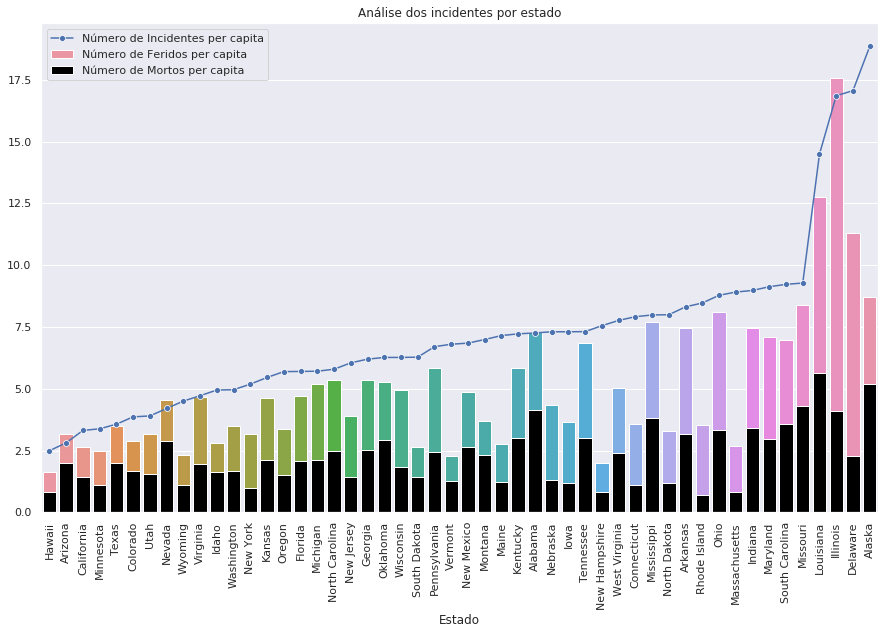

In [7]:
# Ajusta um dataframe com os dados para plotar

states['killed_injured_per_capita'] = (states['injured_per_capita'] +
                                       states['killed_per_capita'])
sorted_states = states.sort_values('incidents_per_capita')

# Define o plot
sns.lineplot(x='state', y='incidents_per_capita', marker='o',
                     data=sorted_states, label='Número de Incidentes per capita', sort=False)
sns.barplot(x='state', y='killed_injured_per_capita',
                     data=sorted_states, label='Número de Feridos per capita')
sns.barplot(x='state', y='killed_per_capita', color="black",
                     data=sorted_states,label='Número de Mortos per capita')
# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

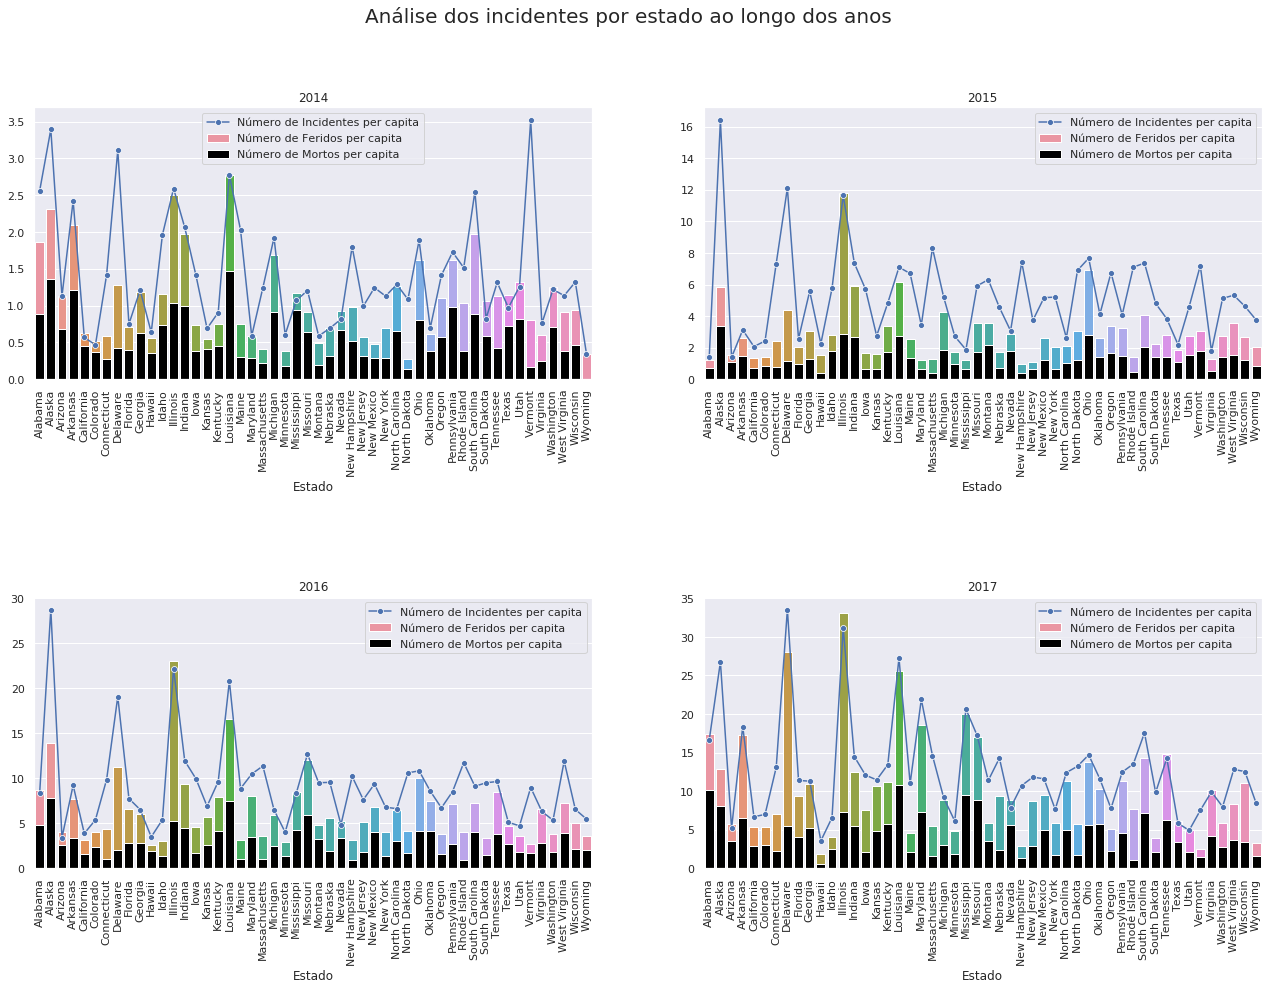

In [8]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Análise dos incidentes por estado ao longo dos anos', fontsize=20)

for index, year in enumerate(range(2014, 2018)):
    ax = fig.add_subplot(2,2,index+1)
    states[f'killed_injured_per_capita_{year}'] = (states[f'injured_per_capita_{year}'] +
                                                   states[f'killed_per_capita_{year}'])

    # Define o plot
    sns.lineplot(x='state', y=f'incidents_per_capita_{year}', marker='o',
                         data=states, label='Número de Incidentes per capita', sort=False)
    sns.barplot(x='state', y=f'killed_injured_per_capita_{year}',
                         data=states, label='Número de Feridos per capita')
    sns.barplot(x='state', y=f'killed_per_capita_{year}', color="black",
                         data=states,label='Número de Mortos per capita')
    # Título do plot
    plt.title(year)
    # Nome do eixo x
    plt.xlabel('Estado')
    # Nome do eixo y
    plt.ylabel('')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=90)
    plt.legend()
plt.savefig('../resultados/incidentes_estado_percapita_ano.png')
plt.show()


## Idade dos envolvidos

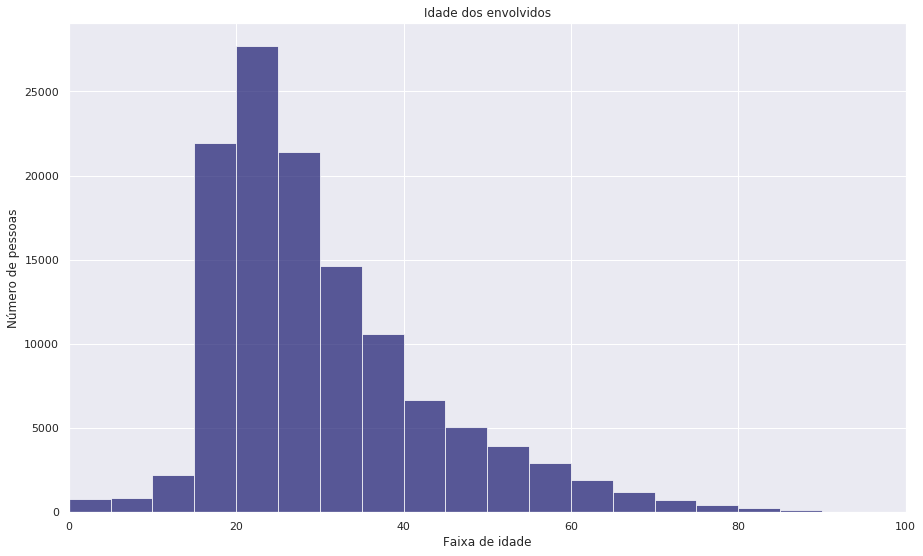

In [9]:
ax = sns.distplot(
    participants[['participant_age']],
    bins=[i for i in range(0,100, 5)],
    kde=False,
    color='midnightblue',
    hist_kws=dict(alpha=0.7)
)

# Limita os valores dos eixos
ax.set(xlim=(0, 100))
# Título do plot
plt.title("Idade dos envolvidos")
# Nome do eixo x
plt.xlabel('Faixa de idade')
# Nome do eixo y
plt.ylabel('Número de pessoas')
plt.show()

## Trends

### Incidents per year

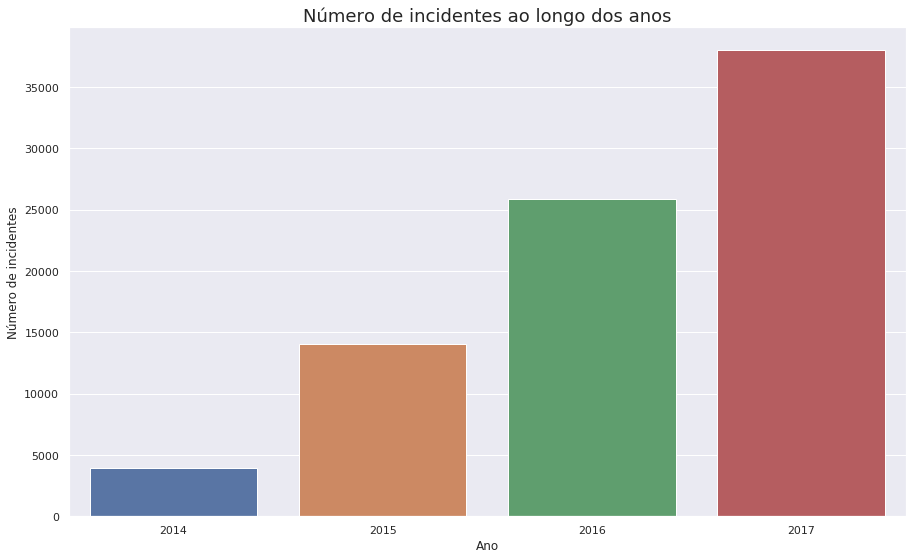

In [10]:
a_per_year = (gun_violence.groupby('year')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'n_incidents'}))

sns.barplot(
    a_per_year['year'],
    a_per_year['n_incidents'],
)

# Título do plot
plt.title("Número de incidentes ao longo dos anos", fontsize=18)
# Nome do eixo x
plt.xlabel('Ano')
# Nome do eixo y
plt.ylabel('Número de incidentes')
plt.show()

Observado uma tendência crescente de 2014 até 2017. 
2018 não possui dados completos do ano todo, a expectativa na época de coleta da base era de crescimento em comparação a 2017.
2013 é um ano de baixo número de entradas na base.

###  Average per month

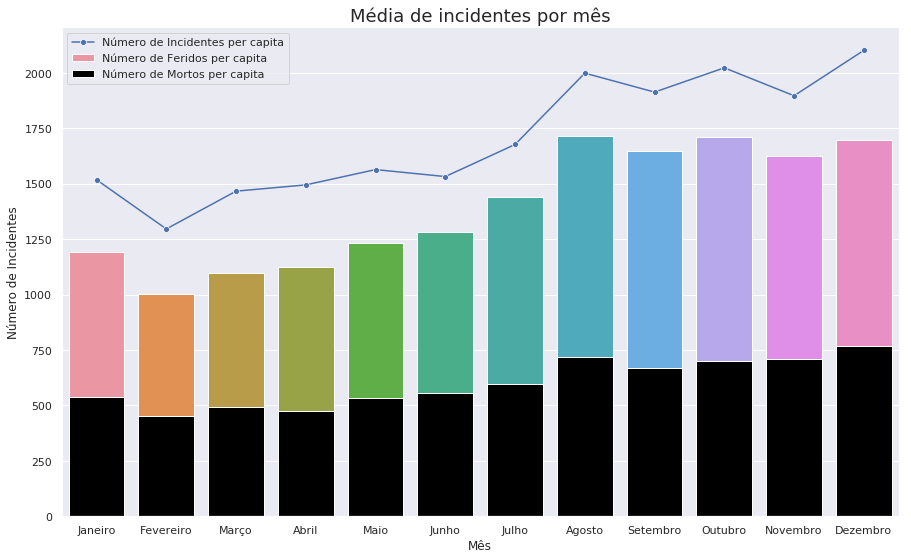

In [11]:
incidents_per_month = (gun_violence.groupby(['year','month'])
              .agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum'})
              .reset_index()
              .rename(columns={'incident_id':'n_incidents'}))

years = ['2014', '2015', '2016', '2017']

months = [
    'Janeiro',
    'Fevereiro',
    'Março',
    'Abril',
    'Maio',
    'Junho',
    'Julho',
    'Agosto',
    'Setembro',
    'Outubro',
    'Novembro',
    'Dezembro'
]

incidents_per_month

incidents_per_year = {}
for year in years:
    incidents_per_year[year] = incidents_per_month[incidents_per_month['year']==year].drop(['year'], axis=1)
    incidents_per_year[year]['month'] = months

incidents_per_month = (gun_violence.groupby(['month'])
              .agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum'})
              .reset_index()
              .rename(columns={'incident_id':'n_incidents'}))

incidents_per_month['month'] = months

incidents_per_month[['n_incidents','n_killed', 'n_injured']] /= 4

incidents_per_month['total_killed_injured'] = (incidents_per_month['n_injured'] +
                                               incidents_per_month['n_killed'])
sns.lineplot(x='month', y='n_incidents', marker='o',
                         data=incidents_per_month, label='Número de Incidentes per capita', sort=False)
sns.barplot(x='month', y='total_killed_injured',
                     data=incidents_per_month, label='Número de Feridos per capita')
sns.barplot(x='month', y='n_killed', color="black",
                     data=incidents_per_month, label='Número de Mortos per capita')

# Título do plot
plt.title("Média de incidentes por mês", fontsize=18)
# Nome do eixo x
plt.xlabel('Mês')
# Nome do eixo y
plt.ylabel('Número de Incidentes')
plt.legend()
plt.show()

Dezembro e Outubro são os meses com maior número médio de incidentes, ultrapassando 2000 incidentes por ano em média.
Fevereiro é o mês com menor número de incidentes, tendo em média pouco mais de 1250 incidentes a cada ano.
É possível perceber uma tendência de mais incidentes no segundo semestre do ano.

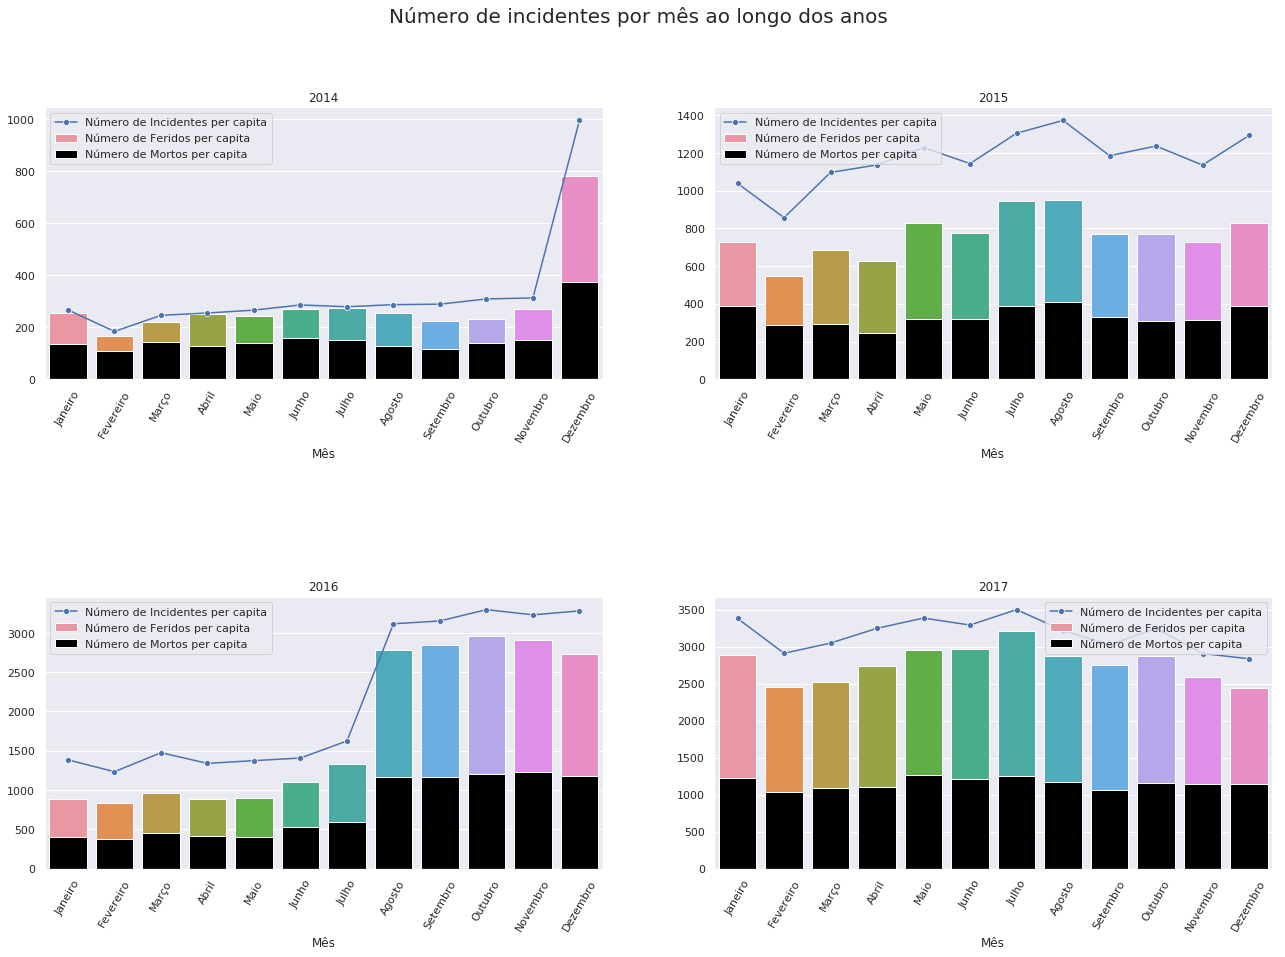

In [12]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Número de incidentes por mês ao longo dos anos', fontsize=20)


for index, year in enumerate(years):
    ax = fig.add_subplot(2,2,index+1)
    
    incidents_per_year[year]['total_killed_injured'] = (incidents_per_year[year]['n_injured'] +
                                                        incidents_per_year[year]['n_killed'])
    
    # Define o plot
    sns.lineplot(x='month', y='n_incidents', marker='o',
                         data=incidents_per_year[year], label='Número de Incidentes per capita', sort=False)
    sns.barplot(x='month', y='total_killed_injured',
                         data=incidents_per_year[year], label='Número de Feridos per capita')
    sns.barplot(x='month', y='n_killed', color="black",
                         data=incidents_per_year[year], label='Número de Mortos per capita')
    
    # Título do plot
    plt.title(year)
    # Nome do eixo x
    plt.xlabel('Mês')
    # Nome do eixo y
    plt.ylabel('')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=60)
    plt.legend()
plt.show()

###  Série temportal para total de incidentes, mortos e feridos

In [13]:
# gun_violence = pd.read_csv('../databases/gun_violence.zip', compression='zip')

In [14]:
# gun_violence['year'] = gun_violence['date'].map(lambda x: x[0:4])
gun_violence['year-month'] = gun_violence['year'].apply(str) + '-' + gun_violence['month'].apply(str)
gun_violence.head()

,incident_id,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_type,year,month,day,year-month
0,854799,Florida,0,0,['Unknown'],['Unknown'],1.0,"['31', '32']","['Adult', 'Adult']","['Male', 'Male']","['Subject-Suspect', 'Subject-Suspect']",2014,01,1,2014-01
1,98134,Louisiana,1,0,['Unknown'],['Unknown'],1.0,"['31', '24']","['Adult', 'Adult']","['Male', 'Male']","['Victim', 'Subject-Suspect']",2014,01,1,2014-01
2,92563,Mississippi,1,0,['Unknown'],['Unknown'],1.0,"['6', '13']","['Child', 'Teen']","['Female', 'Male']","['Victim', 'Subject-Suspect']",2014,01,1,2014-01
3,97976,Hawaii,1,0,['Unknown'],['Unknown'],1.0,"['88', '41']","['Adult', 'Adult']","['Male', 'Male']","['Victim', 'Subject-Suspect']",2014,01,1,2014-01
4,92117,Kentucky,0,1,['Unknown'],['Unknown'],1.0,['22'],"['Adult', 'Adult']","['Male', 'Male']","['Victim', 'Subject-Suspect']",2014,01,1,2014-01


In [15]:
temp = gun_violence[gun_violence['year-month'] > '2013-12'].groupby('year-month')\
         .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
         .reset_index()\
         .rename(columns={'state' : 'incidents'})

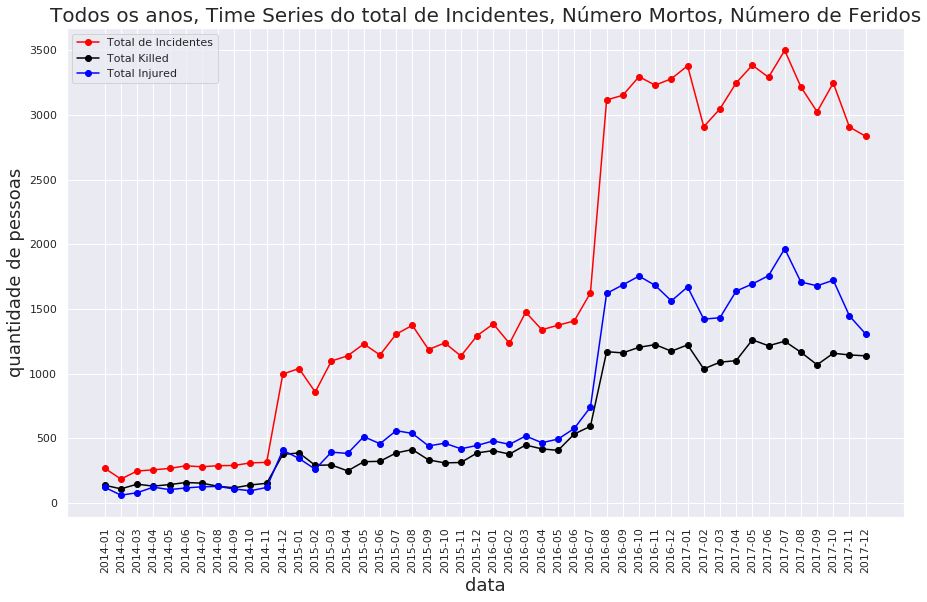

In [16]:
title = 'Todos os anos, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['year-month'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['year-month'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['year-month'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['year-month'], rotation='90')

plt.legend()
plt.savefig('../resultados/time_series_all.png')
plt.show()
